In [ ]:
!pip install -r requirements.txt

In [2]:
import sys 

sys.path.insert(1, 'My_libs/')

import IDmeter
import importlib
importlib.reload(IDmeter)

import Plot_figures
import importlib
importlib.reload(Plot_figures)

import Download_data
import importlib
importlib.reload(Download_data)

import collections
import numpy as np
import matplotlib.pyplot as plt

# Panel 4

In the following code we reproduce Figs. 4A, B, C of the main text of our article titled "The intrinsic dimension of gene expression during cell differentiation".

# Hydra interstitial layer

The original dataset is available on GEO repository (GSE121617).

From the metadata they supply, we took the column named "Cluster" and renamed it *cell-type* in *adata.obs*. Cell-types beginning with 'i_' belongs to intersitial layer. We only considered cell-types represented by more than 400 cells, namely: 'i_SC/prog', 'i_nc_prog', 'i_nc_gc_prog', 'i_nb3', 'i_nb4', 'i_nem', 'i_n_ec1', 'i_n_ec2', 'i_mgl', 'i_gmgc', 'i_smgc2', 'i_zmg1'. 

### Download data

In [3]:
dataset_name = "Hydra"
data_file_path = 'Data/'
data_file_name = 'Hydra_formatted.h5ad'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_path, 
                                                  data_file_name, 
                                                  verbose = True)

Welcome to HYDRA dataset!


/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


scRNA-seq data in a counts matrix cells x genes with shape ((24984, 37114))
Gene names stored in adata.var
Metadata about cells stored in adata.obs (Index(['celltype', 'cell'], dtype='object'))

Quality control on cells...
In order to follow the quality control of the paper:
 - cells with less than 200, or more than 8000 expressed genes were deleted (0)
 - cells with size greater than 400 and smaller than 70000 were deleted (0)
 - cells with mitochondrial gene-expression fractions greater than 5.0% were deleted (0)

Genes selection...
Cannot select protein-coding genes because they are not available for Hydra in Ensembl database
Deleting genes full of zeros

Normalization of the counts matrix...

After the filtering procedure, scRNA-seq data have shape ((24984, 36814))


### ID measure

In [4]:
labels = np.array(['i_SC/prog', 'i_nc_prog', 'i_nc_gc_prog', 
                   'i_nb3', 'i_nb4', 'i_nem', 
                   'i_n_ec1', 'i_n_ec2', 'i_mgl', 'i_gmgc', 
                   'i_smgc2', 'i_zmg1'])

In [5]:
selected_cts = np.array([ct for ct in df.celltype.values if ct in labels])
celltypes_dict = dict(collections.Counter(selected_cts))

celltypes_dict = dict(sorted(celltypes_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(celltypes_dict.values())[0]*0.75)

print("Number of cells per cell-type:", celltypes_dict)
print("From each cell-type we will sub-sample", n_subsampled_cells, "cells")

Number of cells per cell-type: {'i_n_ec2': 442, 'i_nb4': 457, 'i_n_ec1': 478, 'i_nb3': 529, 'i_mgl': 535, 'i_zmg1': 537, 'i_nem': 549, 'i_gmgc': 560, 'i_nc_gc_prog': 567, 'i_smgc2': 618, 'i_nc_prog': 717, 'i_SC/prog': 1879}
From each cell-type we will sub-sample 331 cells


In [6]:
dataset_name = "Hydra"
labeling = "Celltype"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset Hydra
Celltype-based grouping of cells
Labels: ['i_SC/prog' 'i_nc_prog' 'i_nc_gc_prog' 'i_nb3' 'i_nb4' 'i_nem' 'i_n_ec1'
 'i_n_ec2' 'i_mgl' 'i_gmgc' 'i_smgc2' 'i_zmg1']
3 independent sub-samplings
Counts matrix dimension=(24984, 36814)


Subsampling number 1 , with seed: 584391. i_SC/prog ID = 34.6 - i_nc_prog ID = 39.2 - i_nc_gc_prog ID = 36.4 - i_nb3 ID = 17.1 - i_nb4 ID = 23.2 - i_nem ID = 21.0 - i_n_ec1 ID = 28.1 - i_n_ec2 ID = 23.2 - i_mgl ID = 26.9 - i_gmgc ID = 11.8 - i_smgc2 ID = 13.0 - i_zmg1 ID = 9.4 - 


Subsampling number 2 , with seed: 992572. i_SC/prog ID = 34.7 - i_nc_prog ID = 39.5 - i_nc_gc_prog ID = 39.7 - i_nb3 ID = 16.1 - i_nb4 ID = 21.6 - i_nem ID = 20.5 - i_n_ec1 ID = 25.8 - i_n_ec2 ID = 23.1 - i_mgl ID = 22.7 - i_gmgc ID = 12.3 - i_smgc2 ID = 12.3 - i_zmg1 ID = 8.7 - 


Subsampling number 3 , with seed: 417828. i_SC/prog ID = 37.8 - i_nc_prog ID = 52.4 - i_nc_gc_prog ID = 37.2 - i_nb3 ID = 17.4 - i_nb4 ID = 21.5 - i_nem ID = 22.8 - i_n_ec1 ID = 

### Plot

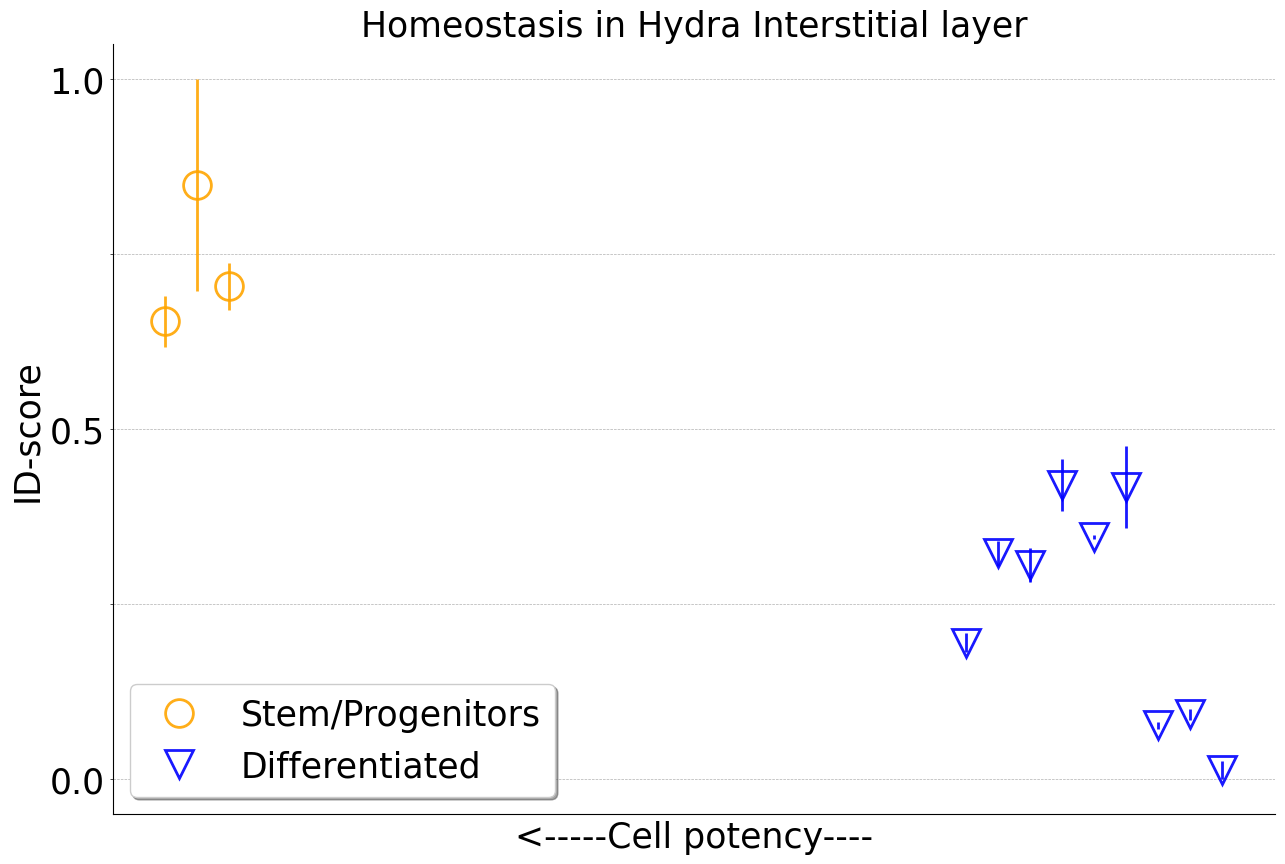

In [7]:
x = results_dict['Mean trend']['Labels']
y = results_dict['Mean trend']['Mean']
y_err = results_dict['Mean trend']['Std']

plot_params = {"label_size": 25, "markersize": 20,
                "linewidth": 4, "linestyle": ' ',
                "alpha": 0.9, "markeredgewidth": 2,
                "ticks_length": 2, "ticks_width": 0.5,
                "f_legend": 1}

fig, ax = plt.subplots(figsize = (15, 10))


title = 'Homeostasis in Hydra Interstitial layer'
celltype_group1 = labels = np.array(['i_SC/prog', 
                                     'i_nc_prog', 
                                     'i_nc_gc_prog'])
x_val = np.arange(1, len(celltype_group1)+1)
label = 'Stem/Progenitors'
plot_params['marker'] = 'o'
plot_params['color'] = 'orange'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype_group1, dataset_name, 
                                title = title, plot_params = plot_params)

lineage_shift = 25

celltype_group2 = labels = np.array(['i_nb3', 'i_nb4', 'i_nem', 
                                    'i_n_ec1', 'i_n_ec2', 'i_mgl', 'i_gmgc', 
                                    'i_smgc2', 'i_zmg1'])
x_val = np.arange(1, len(celltype_group2)+1)+lineage_shift
label = 'Differentiated'
plot_params['marker'] = 'v'
plot_params['color'] = 'blue'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype_group2, dataset_name, 
                                title = title, plot_params = plot_params)

# Hydra endodermal layer

The original dataset is available on GEO repository (GSE121617).

From the metadata they supply, we took the column named "Cluster" and renamed it *cell-type* in *adata.obs*. Cell-types beginning with 'en_' belongs to endodermal layer. We only considered cell-types represented by more than 400 cells, namely: 'enEp_SC1', 'enEp_SC2', 'enEp_SC3', 'enEp_head', 'enEp_foot', 'enEp_tent'.

### Download data

In [8]:
dataset_name = "Hydra"
data_file_path = 'Data/'
data_file_name = 'Hydra_formatted.h5ad'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_path, 
                                                  data_file_name, 
                                                  verbose = True)

Welcome to HYDRA dataset!


/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


scRNA-seq data in a counts matrix cells x genes with shape ((24984, 37114))
Gene names stored in adata.var
Metadata about cells stored in adata.obs (Index(['celltype', 'cell'], dtype='object'))

Quality control on cells...
In order to follow the quality control of the paper:
 - cells with less than 200, or more than 8000 expressed genes were deleted (0)
 - cells with size greater than 400 and smaller than 70000 were deleted (0)
 - cells with mitochondrial gene-expression fractions greater than 5.0% were deleted (0)

Genes selection...
Cannot select protein-coding genes because they are not available for Hydra in Ensembl database
Deleting genes full of zeros

Normalization of the counts matrix...

After the filtering procedure, scRNA-seq data have shape ((24984, 36814))


### ID measure

In [18]:
labels = np.array(['enEp_SC1', 'enEp_SC2', 'enEp_SC3', 
                   'enEp_head', 'enEp_foot', 'enEp_tent'])

In [19]:
selected_cts = np.array([ct for ct in df.celltype.values if ct in labels])
celltypes_dict = dict(collections.Counter(selected_cts))

celltypes_dict = dict(sorted(celltypes_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(celltypes_dict.values())[0]*0.75)

print("Number of cells per cell-type:", celltypes_dict)
print("From each cell-type we will sub-sample", n_subsampled_cells, "cells")

Number of cells per cell-type: {'enEp_tent': 458, 'enEp_foot': 659, 'enEp_head': 825, 'enEp_SC3': 841, 'enEp_SC2': 961, 'enEp_SC1': 2203}
From each cell-type we will sub-sample 343 cells


In [22]:
dataset_name = "Hydra"
labeling = "Celltype"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset Hydra
Celltype-based grouping of cells
Labels: ['enEp_SC1' 'enEp_SC2' 'enEp_SC3' 'enEp_head' 'enEp_foot' 'enEp_tent']
3 independent sub-samplings
Counts matrix dimension=(24984, 36814)


Subsampling number 1 , with seed: 262318. enEp_SC1 ID = 22.8 - enEp_SC2 ID = 25.0 - enEp_SC3 ID = 31.6 - enEp_head ID = 22.3 - enEp_foot ID = 18.8 - enEp_tent ID = 17.2 - 


Subsampling number 2 , with seed: 793614. enEp_SC1 ID = 24.3 - enEp_SC2 ID = 27.5 - enEp_SC3 ID = 36.5 - enEp_head ID = 20.9 - enEp_foot ID = 20.7 - enEp_tent ID = 17.5 - 


Subsampling number 3 , with seed: 262671. enEp_SC1 ID = 23.4 - enEp_SC2 ID = 24.6 - enEp_SC3 ID = 30.8 - enEp_head ID = 21.3 - enEp_foot ID = 20.9 - enEp_tent ID = 17.1 - 



### Plot

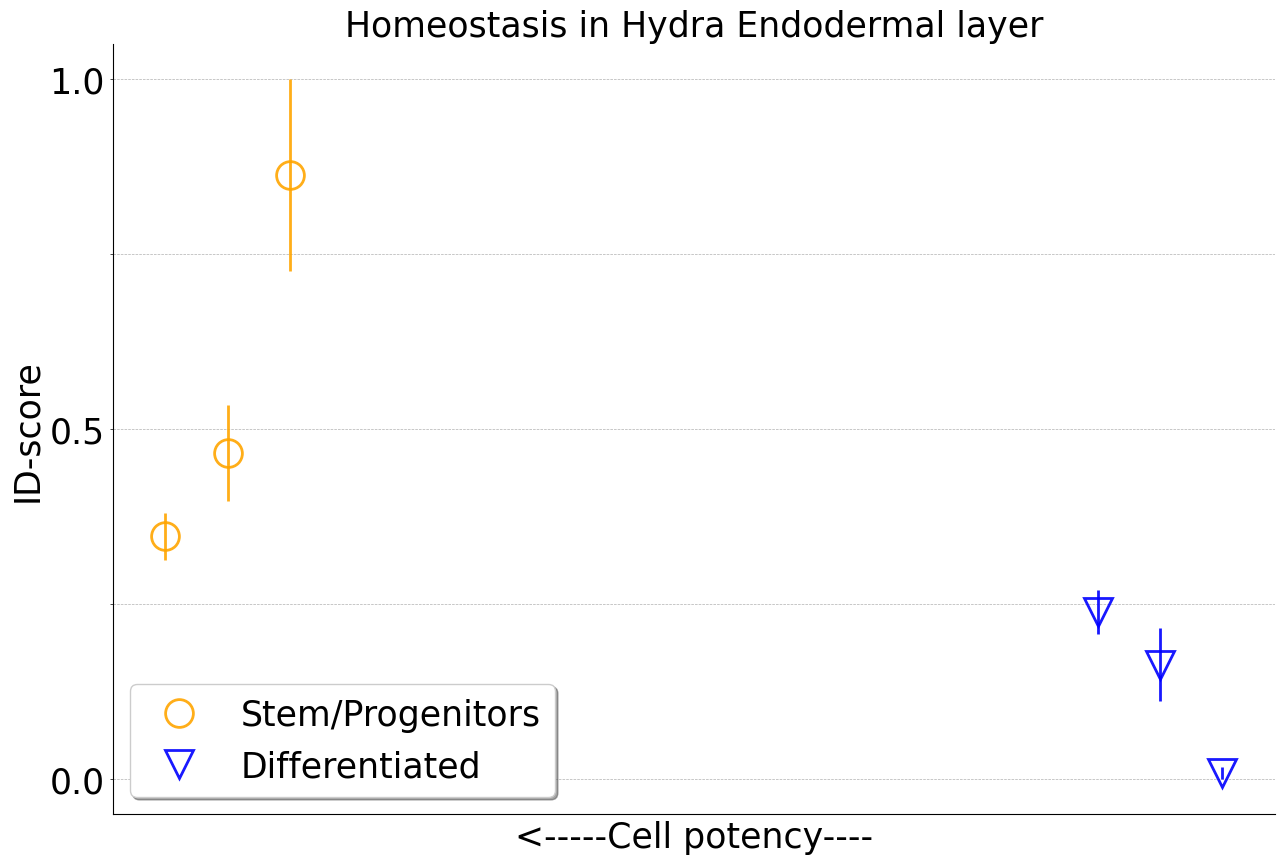

In [23]:
x = results_dict['Mean trend']['Labels']
y = results_dict['Mean trend']['Mean']
y_err = results_dict['Mean trend']['Std']

plot_params = {"label_size": 25, "markersize": 20,
                "linewidth": 4, "linestyle": ' ',
                "alpha": 0.9, "markeredgewidth": 2,
                "ticks_length": 2, "ticks_width": 0.5,
                "f_legend": 1}

fig, ax = plt.subplots(figsize = (15, 10))


title = 'Homeostasis in Hydra Endodermal layer'
celltype_group1 = np.array(['enEp_SC1', 'enEp_SC2', 'enEp_SC3'])
x_val = np.arange(1, len(celltype_group1)+1)
label = 'Stem/Progenitors'
plot_params['marker'] = 'o'
plot_params['color'] = 'orange'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype_group1, dataset_name, 
                                title = title, plot_params = plot_params)

lineage_shift = 15

celltype_group2 = np.array(['enEp_head', 'enEp_foot', 'enEp_tent'])
x_val = np.arange(1, len(celltype_group2)+1)+lineage_shift
label = 'Differentiated'
plot_params['marker'] = 'v'
plot_params['color'] = 'blue'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype_group2, dataset_name, 
                                title = title, plot_params = plot_params)

# Hydra ectodermal layer

The original dataset is available on GEO repository (GSE121617).

From the metadata they supply, we took the column named "Cluster" and renamed it *cell-type* in *adata.obs*. Cell-types beginning with 'ec_' belongs to ectodermal layer. We only considered cell-types represented by more than 400 cells, namely: 'ecEp_SC1', 'ecEp_SC2', 'ecEp-nem(id)', 'ecEp_head', 'ecEp_bd', 'ecEp_bat2(mp)', 'ecEp-nb(pd)'.

### Data download

In [13]:
dataset_name = "Hydra"
data_file_path = 'Data/'
data_file_name = 'Hydra_formatted.h5ad'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_path, 
                                                  data_file_name, 
                                                  verbose = True)

Welcome to HYDRA dataset!


/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


scRNA-seq data in a counts matrix cells x genes with shape ((24984, 37114))
Gene names stored in adata.var
Metadata about cells stored in adata.obs (Index(['celltype', 'cell'], dtype='object'))

Quality control on cells...
In order to follow the quality control of the paper:
 - cells with less than 200, or more than 8000 expressed genes were deleted (0)
 - cells with size greater than 400 and smaller than 70000 were deleted (0)
 - cells with mitochondrial gene-expression fractions greater than 5.0% were deleted (0)

Genes selection...
Cannot select protein-coding genes because they are not available for Hydra in Ensembl database
Deleting genes full of zeros

Normalization of the counts matrix...

After the filtering procedure, scRNA-seq data have shape ((24984, 36814))


### ID measure

In [14]:
labels = np.array(['ecEp_SC1', 'ecEp_SC2', 
                   'ecEp-nem(id)', 'ecEp_head', 
                   'ecEp_bd', 'ecEp_bat2(mp)', 
                   'ecEp-nb(pd)'])

In [15]:
selected_cts = np.array([ct for ct in df.celltype.values if ct in labels])
celltypes_dict = dict(collections.Counter(selected_cts))

celltypes_dict = dict(sorted(celltypes_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(celltypes_dict.values())[0]*0.75)

print("Number of cells per cell-type:", celltypes_dict)
print("From each cell-type we will sub-sample", n_subsampled_cells, "cells")

Number of cells per cell-type: {'ecEp-nem(id)': 449, 'ecEp_bd': 452, 'ecEp_bat2(mp)': 608, 'ecEp_head': 695, 'ecEp-nb(pd)': 759, 'ecEp_SC2': 1145, 'ecEp_SC1': 1563}
From each cell-type we will sub-sample 336 cells


In [16]:
dataset_name = "Hydra"
labeling = "Celltype"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset Hydra
Celltype-based grouping of cells
Labels: ['ecEp_SC1' 'ecEp_SC2' 'ecEp-nem(id)' 'ecEp_head' 'ecEp_bd'
 'ecEp_bat2(mp)' 'ecEp-nb(pd)']
3 independent sub-samplings
Counts matrix dimension=(24984, 36814)


Subsampling number 1 , with seed: 686377. ecEp_SC1 ID = 22.7 - ecEp_SC2 ID = 20.0 - ecEp-nem(id) ID = 20.1 - ecEp_head ID = 19.5 - ecEp_bd ID = 15.6 - ecEp_bat2(mp) ID = 15.5 - ecEp-nb(pd) ID = 15.5 - 


Subsampling number 2 , with seed: 570496. ecEp_SC1 ID = 23.4 - ecEp_SC2 ID = 18.9 - ecEp-nem(id) ID = 19.1 - ecEp_head ID = 17.0 - ecEp_bd ID = 16.6 - ecEp_bat2(mp) ID = 18.5 - ecEp-nb(pd) ID = 16.4 - 


Subsampling number 3 , with seed: 310619. ecEp_SC1 ID = 24.4 - ecEp_SC2 ID = 16.9 - ecEp-nem(id) ID = 20.3 - ecEp_head ID = 18.7 - ecEp_bd ID = 16.0 - ecEp_bat2(mp) ID = 15.8 - ecEp-nb(pd) ID = 16.2 - 



### Plot

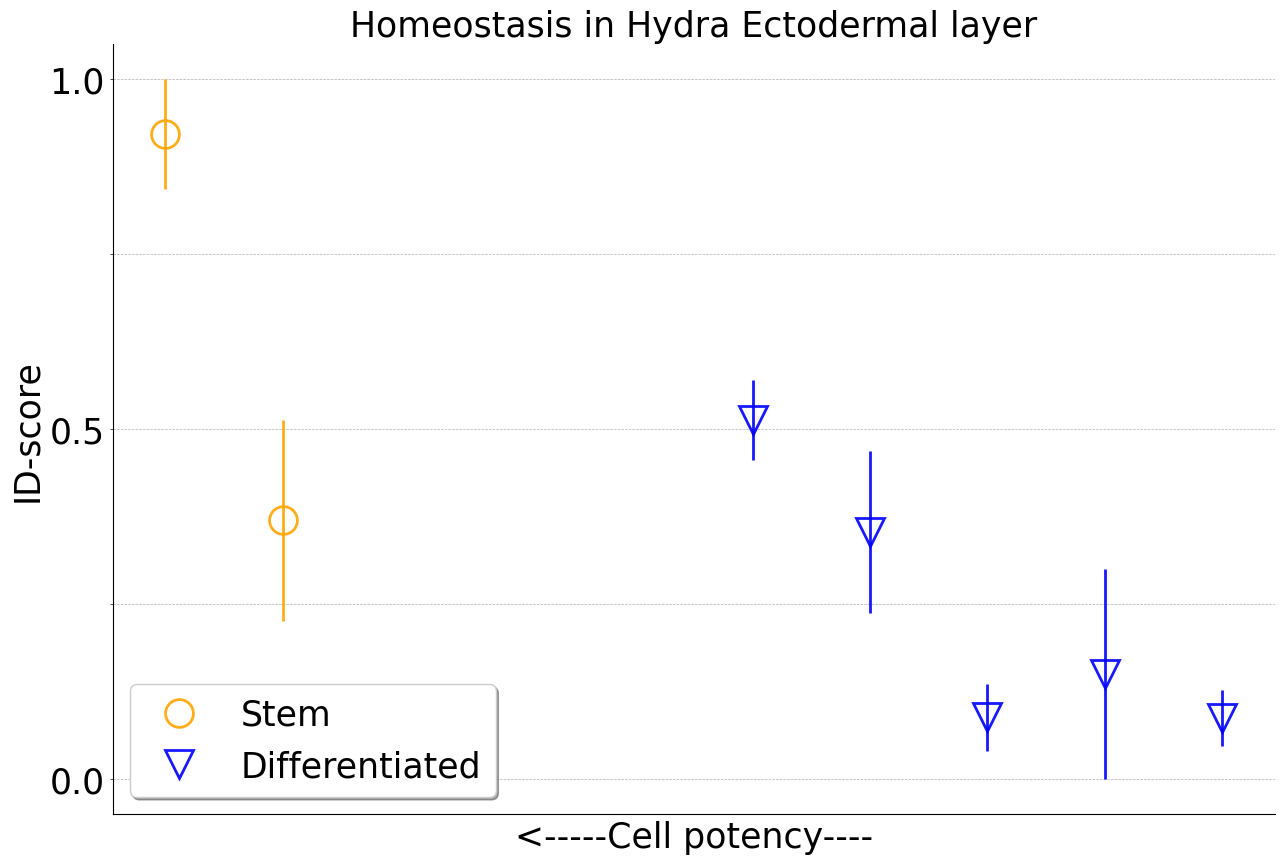

In [17]:
x = results_dict['Mean trend']['Labels']
y = results_dict['Mean trend']['Mean']
y_err = results_dict['Mean trend']['Std']

plot_params = {"label_size": 25, "markersize": 20,
                "linewidth": 4, "linestyle": ' ',
                "alpha": 0.9, "markeredgewidth": 2,
                "ticks_length": 2, "ticks_width": 0.5,
                "f_legend": 1}

fig, ax = plt.subplots(figsize = (15, 10))


title = 'Homeostasis in Hydra Ectodermal layer'
celltype_group1 = np.array(['ecEp_SC1', 'ecEp_SC2'])
x_val = np.arange(1, len(celltype_group1)+1)
label = 'Stem'
plot_params['marker'] = 'o'
plot_params['color'] = 'orange'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype_group1, dataset_name, 
                                title = title, plot_params = plot_params)

lineage_shift = 5

celltype_group2 = np.array(['ecEp-nem(id)', 'ecEp_head', 
                            'ecEp_bd', 'ecEp_bat2(mp)', 
                            'ecEp-nb(pd)'])
x_val = np.arange(1, len(celltype_group2)+1)+lineage_shift
label = 'Differentiated'
plot_params['marker'] = 'v'
plot_params['color'] = 'blue'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype_group2, dataset_name, 
                                title = title, plot_params = plot_params)